In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header=None)
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [132]:
df.shape

(214, 11)

In [133]:
print("No.of rows in the dataset",df.shape[0])
print("No.of columns in the dataset",df.shape[1])

No.of rows in the dataset 214
No.of columns in the dataset 11


The Dataset Contains 213 rows and 11 columns where 10 are independent variables and 1 is target variable

In [134]:
df.dtypes

Id              int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

This dataset contains two types of data:int64 and float

In [135]:
df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

<Axes: >

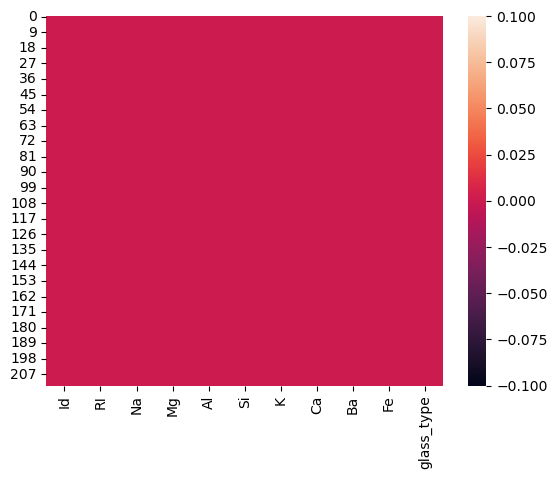

In [136]:
sns.heatmap(df.isnull())

From the above heatmap it is clear that there is no missing data present in our Dataset

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [138]:
df.duplicated().sum()

0

In [139]:
df = df.drop('Id', axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


We have dropped ID column as it has no relevance in prediction of target variable

In [140]:
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
glass_type,6


There are total 6 types of uniques values in the target variable and the no of rows in the dataset are 214 which is a huge gap so this problem can be considered as classification problem

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64


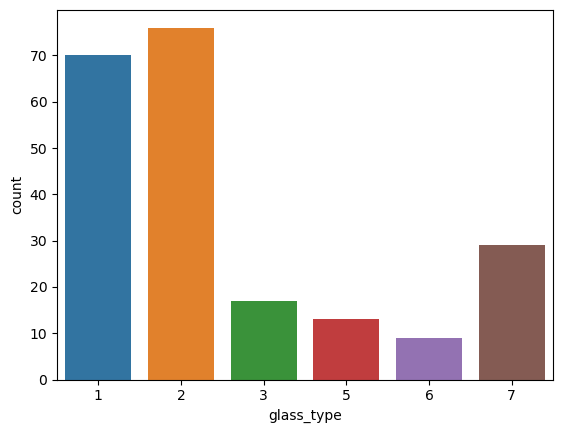

In [141]:
AX=sns.countplot(x=df['glass_type'])
print(df["glass_type"].value_counts())

As we observe in the graph that there are majority of glass is 1 and 2 means window glass also there are no sample of class 4 glass and very less sample of non-window glass 

Now we convert type of glass columns in value of 1 and 0 if the values are 1-4 then it is 0 and if values 5-7 then 1

In [142]:
df['glass_type'].replace([1,2,3,4,5,6,7],[0,0,0,0,1,1,1],inplace=True)

In [143]:
df['glass_type'].unique()

array([0, 1], dtype=int64)

Now we observe that there are only two values 0 and 1 0 means windows glass and 1 means non-windows glass

0    163
1     51
Name: glass_type, dtype: int64


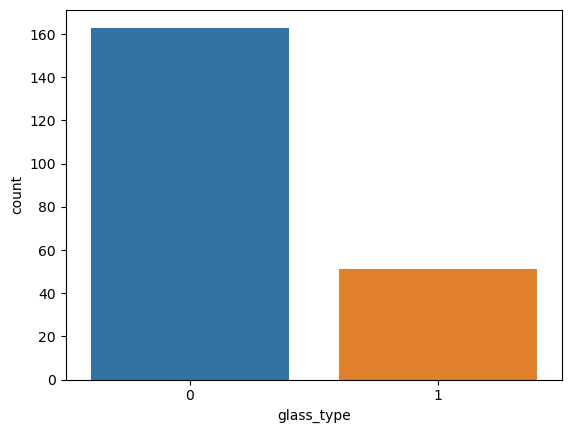

In [144]:
AX=sns.countplot(x=df['glass_type'])
print(df["glass_type"].value_counts())

As we observe in the graph we clearly see that there is imbalance of class almost 75% data is for window glass and rest for non window glass

In [145]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


From the above we can observe: 1.Since count is same for all the columns so there are no missing values present in the dataset 2.Mean is greater than median(50%)for RI,Na,AI,Ca,Ba,Fe so data is skewed to right for these coulmns 3.Mean is less than median(50%)for Mg,Si,K so data is skewed to left for this column 4.Large difference in 75% and max value for Ca and moderate difference in 75% and max value for other columns so this shows the dataset has outliers and skewness present.

Univarient Analysis

<Axes: xlabel='RI', ylabel='Count'>

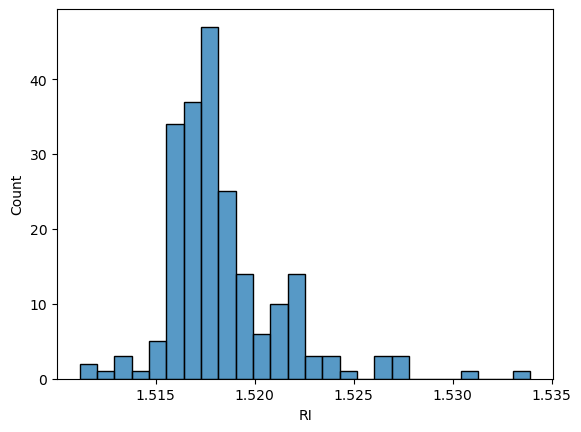

In [146]:
sns.histplot(df['RI'])

From the above plot we can see that maximum value of RI is between 1.17 to 1.19.

<Axes: xlabel='Na', ylabel='Count'>

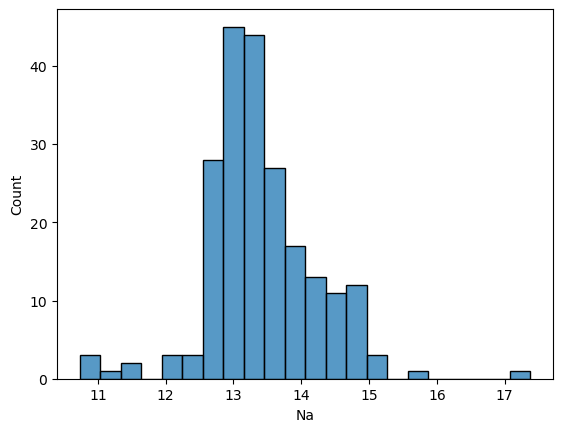

In [147]:
sns.histplot(df['Na'])

From the above plot we can see that maximum value of Na is between 13 to 13.5

<Axes: xlabel='Mg', ylabel='Count'>

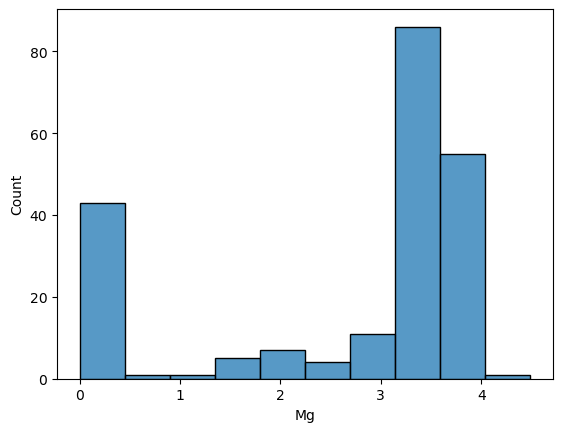

In [148]:
sns.histplot(df['Mg'])

From the above plot we can see that maximum value of Na is between 3.2 to 3.4

<Axes: xlabel='Al', ylabel='Count'>

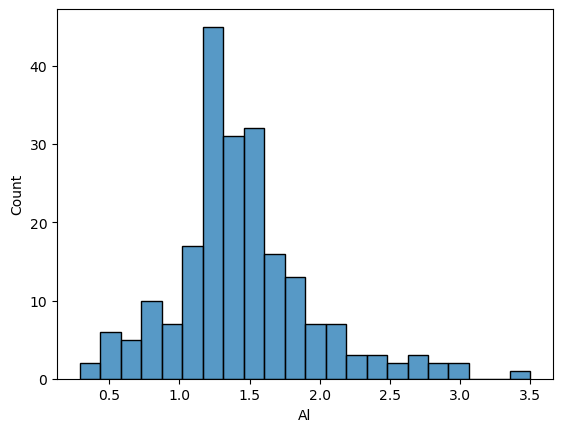

In [149]:
sns.histplot(df['Al'])

From the above plot we can see that maximum value of AI is between 1.2 to 1.4

<Axes: xlabel='Si', ylabel='Count'>

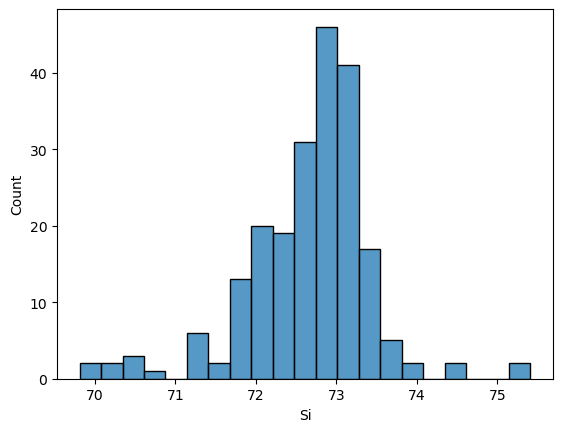

In [150]:
sns.histplot(df['Si'])

From the above plot we can see that maximum value of Si is between 72.9 to 73.2

<Axes: xlabel='K', ylabel='Count'>

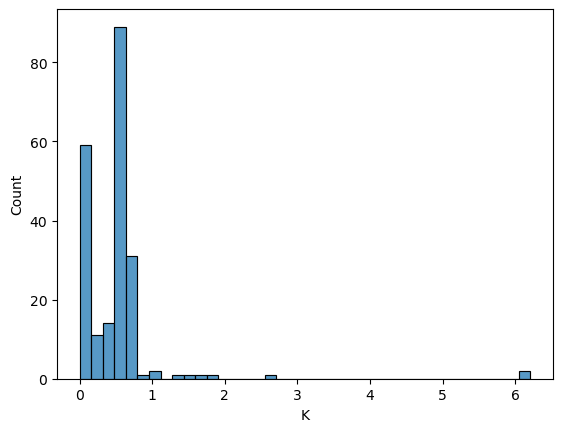

In [151]:
sns.histplot(df['K'])

From the above plot we can see that maximum value of K is between 0.2 to 0.5.

<Axes: xlabel='Ca', ylabel='Count'>

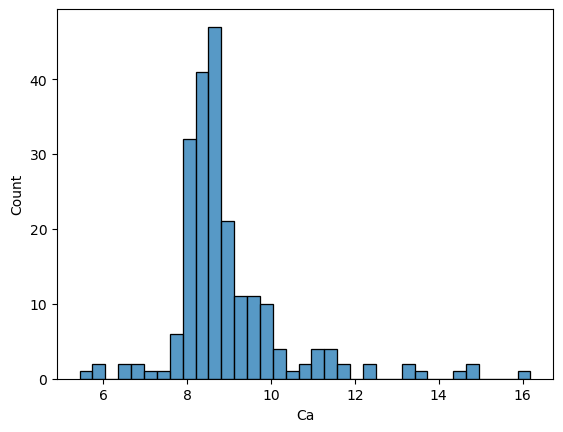

In [152]:
sns.histplot(df['Ca'])

From the above plot we can see that maximum value of Ca is between  8.3 to 9

<Axes: xlabel='Ba', ylabel='Count'>

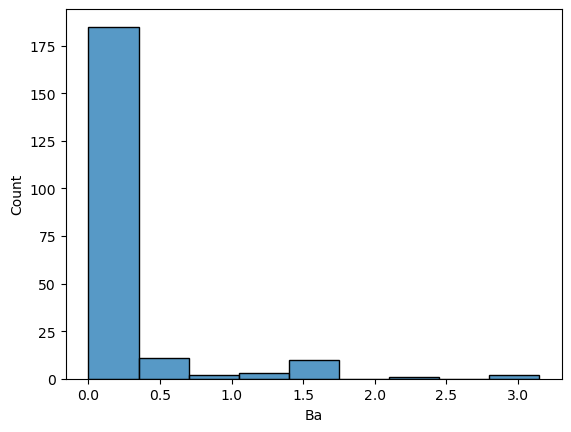

In [153]:
sns.histplot(df['Ba'])

From the above plot we can see that maximum value of Ba is between 0 to 0.4

<Axes: xlabel='Fe', ylabel='Count'>

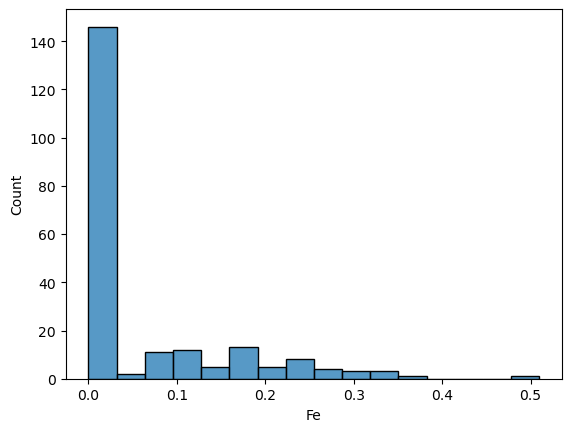

In [154]:
sns.histplot(df['Fe'])

From the above plot we can see that maximum value of Fe is between 0 to 0.05

<Axes: xlabel='glass_type', ylabel='count'>

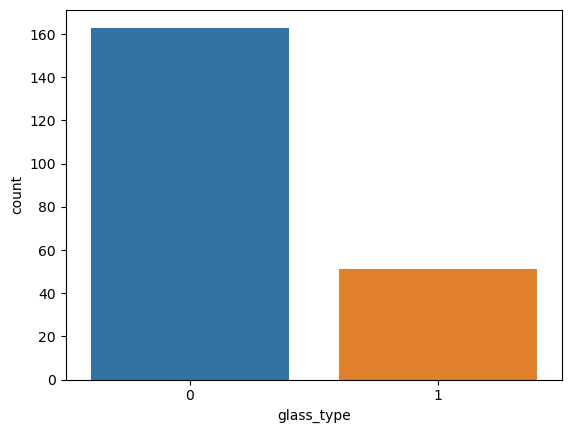

In [155]:
sns.countplot(x=df['glass_type'])

From the above plot we observe that major values are type of glass 0,this is our target variable

BiVariate Analysis

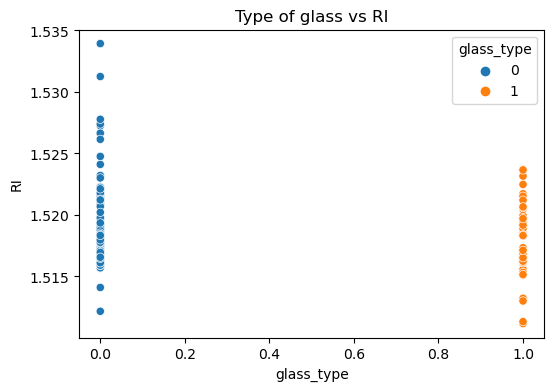

In [156]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs RI')
sns.scatterplot(x=df['glass_type'],y=df['RI'],hue=df['glass_type'])
plt.show()

From the above plot we see that for window glass the value of RI is between 1.5118 to 1.525 and for non window glass the value of RI is less than 1.525

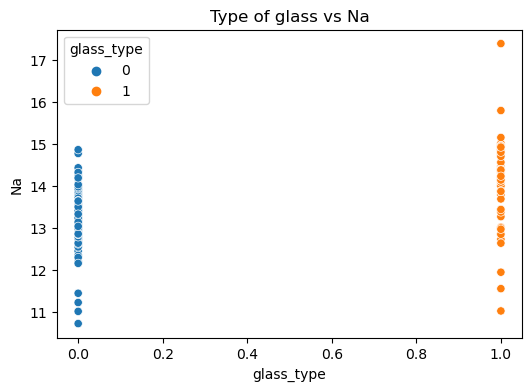

In [157]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Na')
sns.scatterplot(x=df['glass_type'],y=df['Na'],hue=df['glass_type'])
plt.show()

From the above plot we observe that for window glass the value of Na is less than 15 and for non window glass the value of Na is between 13 to 15

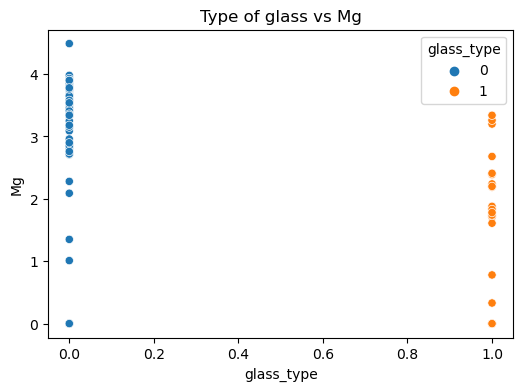

In [158]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Mg')
sns.scatterplot(x=df['glass_type'],y=df['Mg'],hue=df['glass_type'])
plt.show()

From the above plot we observe that for window glass the value of Mg is between 2.9 to 4 and for non window glass the value of Mg is less than 2.5

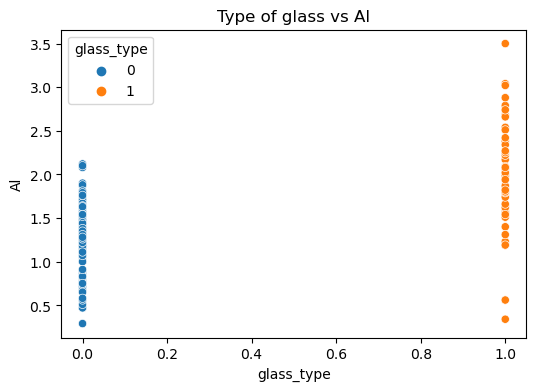

In [159]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Al')
sns.scatterplot(x=df['glass_type'],y=df['Al'],hue=df['glass_type'])
plt.show()

From the above plot we see that for window glass the value of Al is less than 2 and for non window glass the value of Al is between 1.4 to 3.

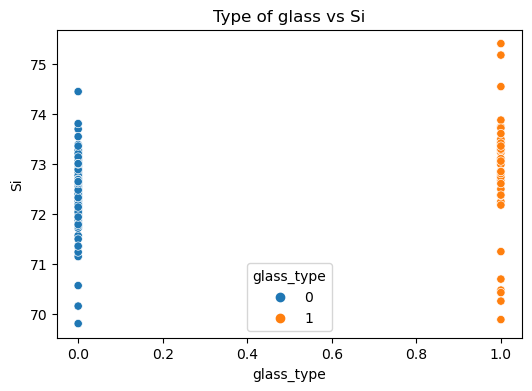

In [160]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Si')
sns.scatterplot(x=df['glass_type'],y=df['Si'],hue=df['glass_type'])
plt.show()


From the above plot we observe that for window glass the value of Si is between 71 to 74

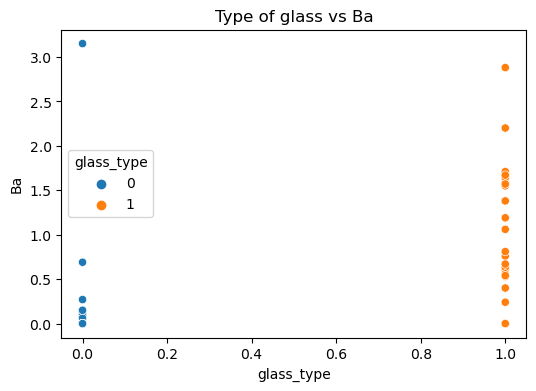

In [161]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Ba')
sns.scatterplot(x=df['glass_type'],y=df['Ba'],hue=df['glass_type'])
plt.show()

From the above plot we observe that for window glass the value of Ba is less than 0.4 and for non window glass the value of Ba is between 0.5 to 2.

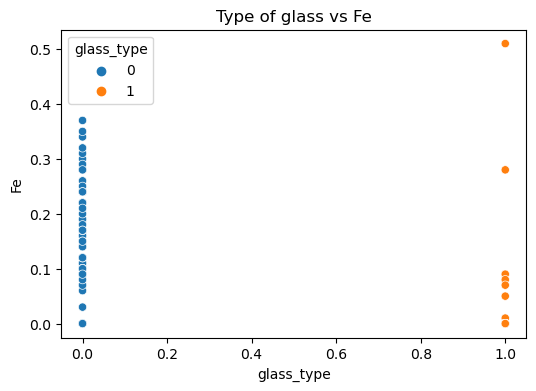

In [162]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Fe')
sns.scatterplot(x=df['glass_type'],y=df['Fe'],hue=df['glass_type'])
plt.show()

From the above plot we observe that for window glass the value of Fe is between 0.05 to 0.4 and for non window glass the value of Fe is less than 0.1

Multivarient Analysis

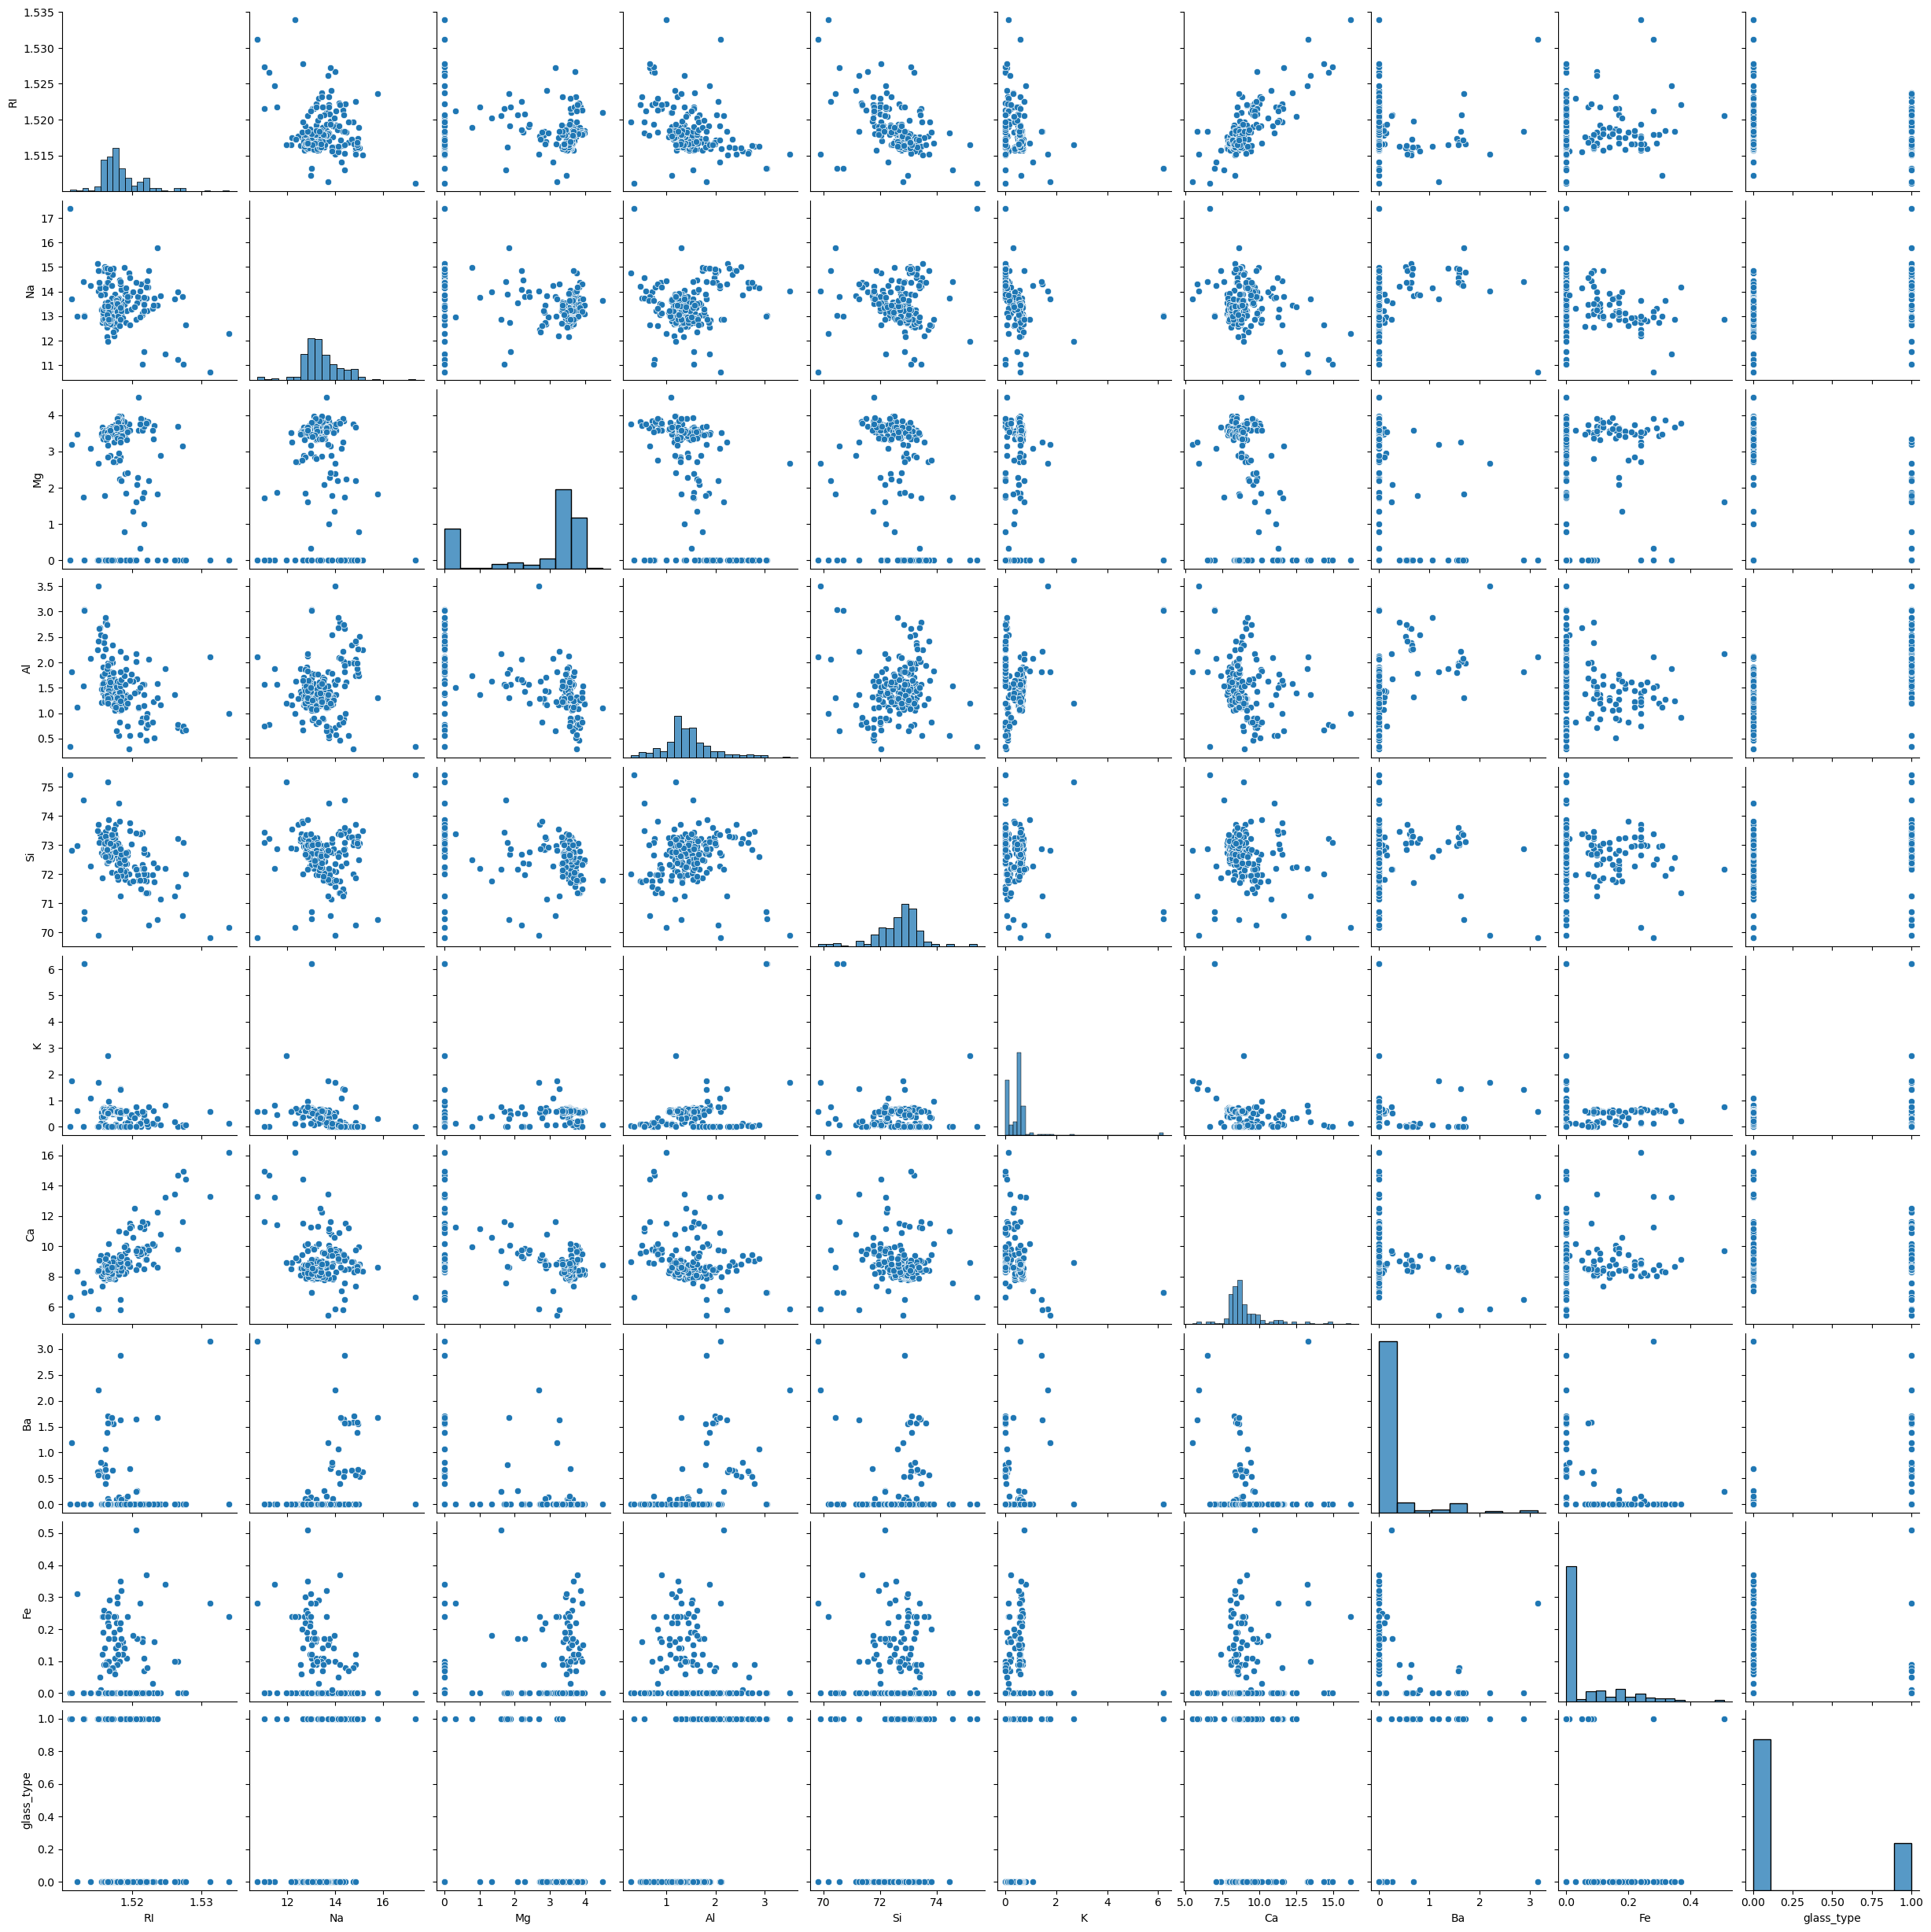

In [163]:
sns.pairplot(df)

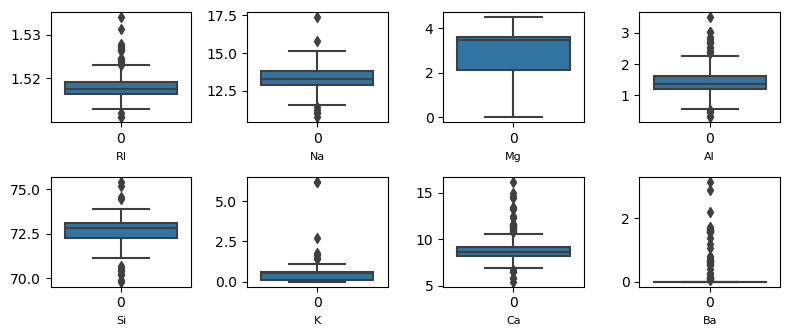

In [164]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in df:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
        pltnumber+=1
plt.tight_layout()

We can clearly see outliers in RI,Na,AL,Si,K,Ca,and Ba so we remove them but before that we drop Ba columns as it has lot of outliers

In [165]:
df.drop(['Ba'],axis=1,inplace=True)

In [166]:
x=df.drop(['glass_type'],axis=1)
y=df['glass_type']

In [167]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3

x=x[(z<3).all(axis=1)]
print(x.shape)

y=y[(z<3).all(axis=1)]
print(y.shape)

(198, 8)
(198,)


In [168]:
data_loss=(214-198)/214*100
data_loss

7.476635514018691

In [169]:
x.skew()

RI    0.964230
Na    0.464034
Mg   -1.424633
Al    0.620498
Si   -0.622500
K     0.430888
Ca    1.021982
Fe    1.517610
dtype: float64

In [170]:
from scipy.stats import boxcox,yeojohnson

In [171]:
x['RI']=boxcox(x['RI'])[0]

In [172]:
x['Mg']=yeojohnson(x['Mg'])[0]

In [173]:
x['Al']=yeojohnson(x['Al'])[0]

In [174]:
x['Si']=boxcox(x['Si'])[0]

In [175]:
x['Ca']=yeojohnson(x['Ca'])[0]

In [176]:
x['Fe']=yeojohnson(x['Fe'])[0]

In [177]:
x.skew()

RI    0.000000
Na    0.464034
Mg   -0.995529
Al    0.014964
Si    0.059867
K     0.430888
Ca   -0.065028
Fe    0.885891
dtype: float64

In [178]:
cor=df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Fe,glass_type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,0.143010,-0.134327
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,-0.241346,0.452336
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,0.083060,-0.758289
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,-0.074402,0.585928
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.094201,0.148072
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.007719,0.053774
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,0.124968,0.040670
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,1.000000,-0.194903
glass_type,-0.134327,0.452336,-0.758289,0.585928,0.148072,0.053774,0.040670,-0.194903,1.000000


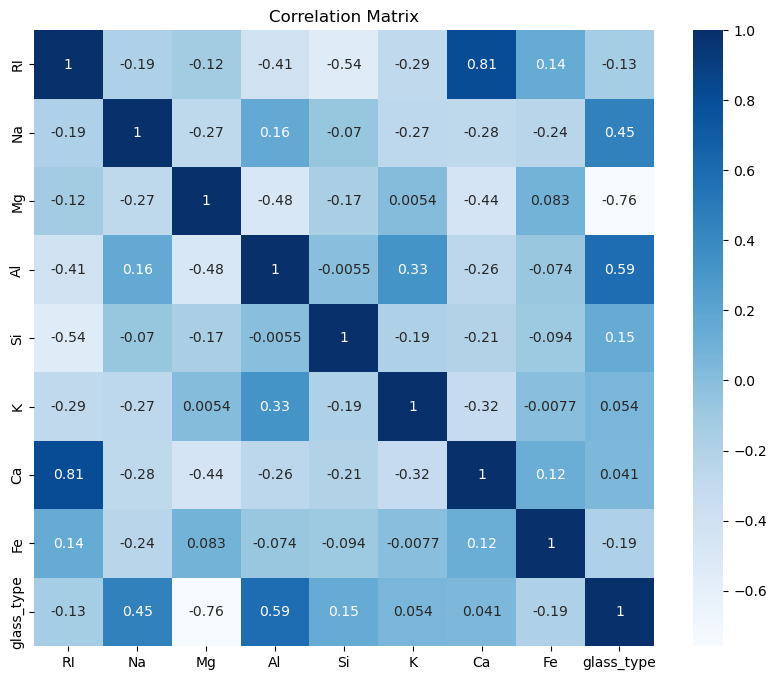

In [179]:
plt.figure(figsize= (10,8))
sns.heatmap(cor, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

From the above plot we observe for independent variables there are not multicollinearity

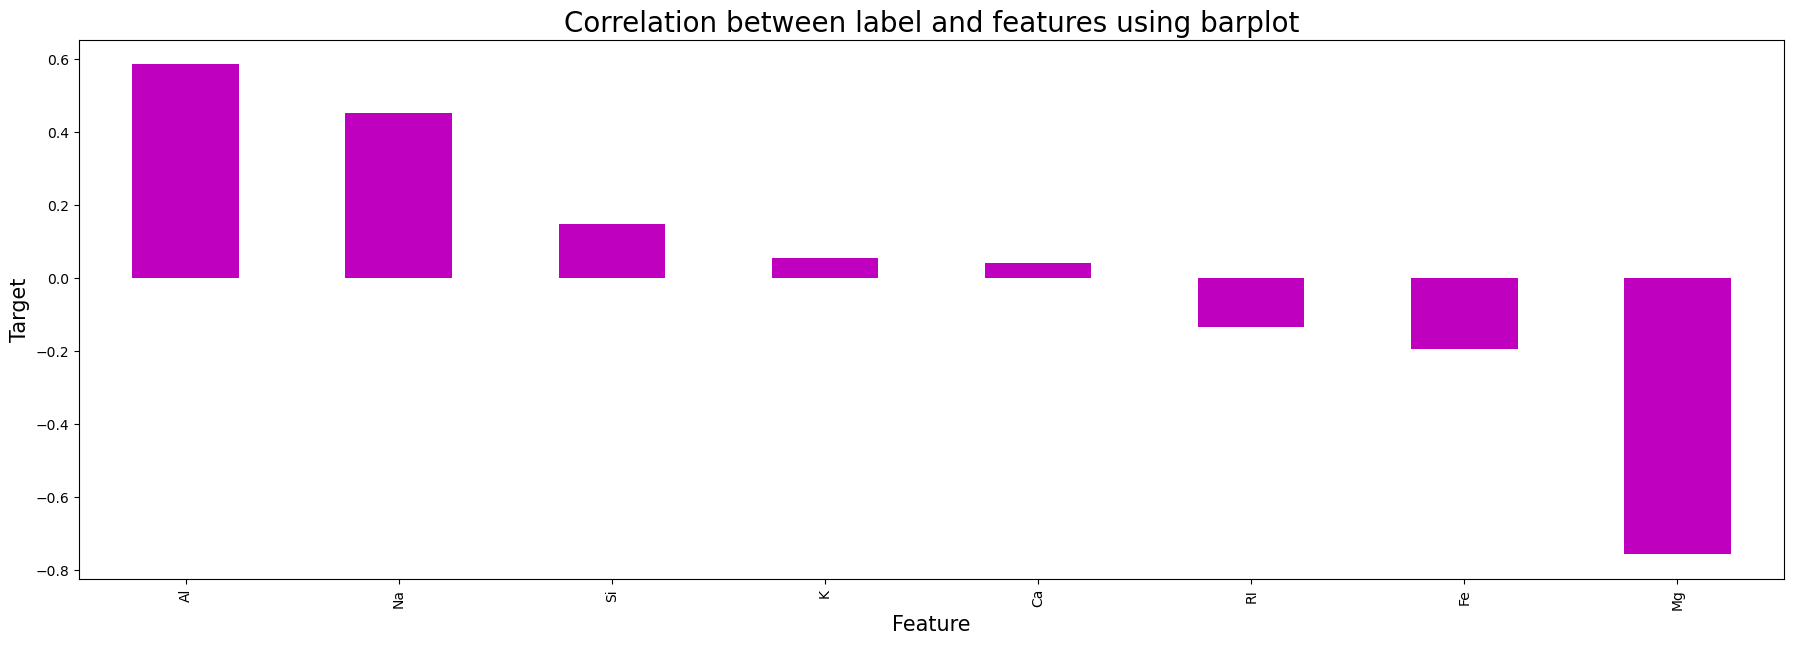

In [180]:
plt.figure(figsize=(22,7))
df.corr()['glass_type'].sort_values(ascending=False).drop(['glass_type']).plot(kind="bar",color="m")
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above plot we can see positive and negative correlated features with the target where Al is positively correlated with the target and Mg is negatively correlated with the target

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.192362e-29,RI
1,9.715644e-02,Na
2,7.763687e-01,Mg
3,1.009558e+00,Al
4,3.765777e+00,Si
5,9.677303e-01,K
6,2.199701e-02,Ca
7,9.888185e-01,Fe


We can see that all the VIF values are below 10 so no need to remove multicollinearity

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,-3.469447e-18,0.279411,2.170505,-0.723719,-1.494168,-1.278321,0.015237,-0.668397
1,-3.469447e-18,0.637537,0.609144,-0.093127,-0.047116,0.166828,-1.024293,-0.668397
2,-3.469447e-18,0.121835,0.535033,0.313310,0.410418,-0.142847,-1.085493,-0.668397
3,-3.469447e-18,-0.336566,0.746051,-0.257521,-0.248806,0.476503,-0.564382,-0.668397
4,-3.469447e-18,-0.250616,0.639177,-0.377284,0.575581,0.407686,-0.737709,-0.668397
...,...,...,...,...,...,...,...,...
193,-3.469447e-18,0.995663,-1.891804,2.804131,-0.248806,-1.209504,0.451398,-0.668397
194,-3.469447e-18,2.113017,-1.891804,1.241792,0.538569,-1.484770,-0.361965,-0.668397
195,-3.469447e-18,1.310814,-1.891804,1.299835,1.232708,-1.484770,-0.317782,-0.668397
196,-3.469447e-18,1.339464,-1.891804,1.144069,1.623874,-1.484770,-0.273884,-0.668397


In [183]:
y.value_counts()

0    154
1     44
Name: glass_type, dtype: int64

As we see that our data is not balanced so we have to balanced it,for that we can use SMOTE technique,here we use over sampling method to balance data

In [184]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [185]:
y.value_counts()

0    154
1    154
Name: glass_type, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [187]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  100.0 on Random_state  107


In [188]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=maxRS)

In [189]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  98.9247311827957
Confusion Matrix:  [[52  0]
 [ 1 40]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.98      0.99        41

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [190]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  100.0
Confusion Matrix:  [[52  0]
 [ 0 41]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        41

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [191]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  100.0
Confusion Matrix:  [[52  0]
 [ 0 41]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        41

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [192]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.989247311827957
Confusion Matrix:  [[52  0]
 [ 1 40]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.98      0.99        41

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [193]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
y_pred = ADA.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.978494623655914
Confusion Matrix:  [[51  1]
 [ 1 40]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.98      0.98      0.98        41

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



In [194]:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
y_pred = BG.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.989247311827957
Confusion Matrix:  [[52  0]
 [ 1 40]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.98      0.99        41

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



In [195]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.978494623655914
Confusion Matrix:  [[51  1]
 [ 1 40]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.98      0.98      0.98        41

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



In [199]:
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score.mean()))

[0.9516129  0.96774194 0.98387097 0.90163934 0.98360656]
0.9576943416181913
Difference between accuracy score and cross validation score is:  0.02080028203772266


In [200]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score1.mean()))

[0.9516129  0.96774194 0.98387097 0.8852459  0.98360656]
0.9544156530936012
Difference between accuracy score and cross validation score is:  0.024078970562312785


In [201]:
score2=cross_val_score(svm,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score2.mean()))

[0.96774194 0.96774194 0.96774194 0.91803279 0.98360656]
0.9609730301427817
Difference between accuracy score and cross validation score is:  0.017521593513132316


In [202]:
score3=cross_val_score(GBC,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score3.mean()))

[0.96774194 0.9516129  0.98387097 0.91803279 0.98360656]
0.9609730301427817
Difference between accuracy score and cross validation score is:  0.017521593513132316


In [203]:
score4=cross_val_score(ADA,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score4.mean()))

[0.91935484 0.93548387 0.96774194 0.86885246 0.98360656]
0.9350079323109466
Difference between accuracy score and cross validation score is:  0.04348669134496741


In [204]:
score5=cross_val_score(BG,x,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score5.mean()))

[0.9516129  0.96774194 0.98387097 0.90163934 0.98360656]
0.9576943416181913
Difference between accuracy score and cross validation score is:  0.02080028203772266


In [205]:
score6=cross_val_score(DTC,x,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score6.mean()))

[0.93548387 0.96774194 0.98387097 0.8852459  0.96721311]
0.9479111581173981
Difference between accuracy score and cross validation score is:  0.030583465538515875


Since the Difference between the Accuracy score and cross validation score is minimum for Gradient Boosting Classifier so i select it as the best working model

In [206]:
param={"criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1,1,0.5],
              'max_depth': [3,4,5],
              'min_samples_leaf': [4,5,6],
              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,15,20]
      }

In [207]:
GSCV=GridSearchCV(GradientBoostingClassifier(),param,cv=8)

In [208]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [5, 10, 15, 20],
                         'subsample': [0.6, 0.7, 0.8]})

In [209]:
GSCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'n_estimators': 15,
 'subsample': 0.7}

In [211]:
final = GradientBoostingClassifier(criterion='friedman_mse',learning_rate= 0.05,loss='exponential',max_depth=5,
max_features='sqrt',min_samples_leaf=6,n_estimators=20,subsample=0.8)
final.fit(x_train,y_train)
pred = final.predict(x_test)
print("Accuracy Score: " , accuracy_score(y_test,pred)*100)

Accuracy Score:  100.0


Since the Accuracy after hypertuning is increased and a very good accuracy is seen. 

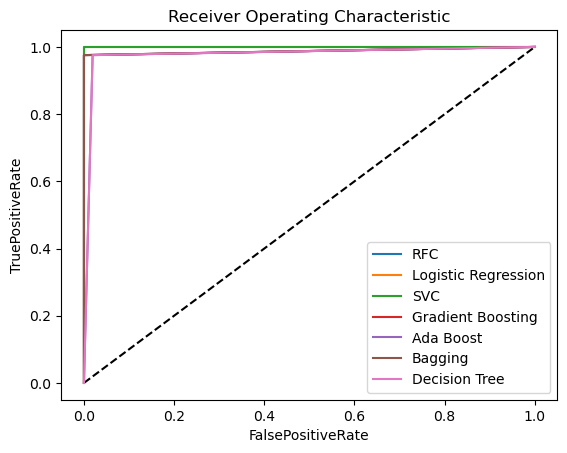

In [212]:
y_pred_prob1 = RFC.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = LR.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = svm.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = GBC.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = ADA.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = BG.predict(x_test)
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

y_pred_prob7 = DTC.predict(x_test)
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RFC")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "SVC")
plt.plot(fpr4, tpr4, label= "Gradient Boosting")
plt.plot(fpr5, tpr5, label= "Ada Boost")
plt.plot(fpr6, tpr6, label= "Bagging")
plt.plot(fpr7, tpr7, label= "Decision Tree")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

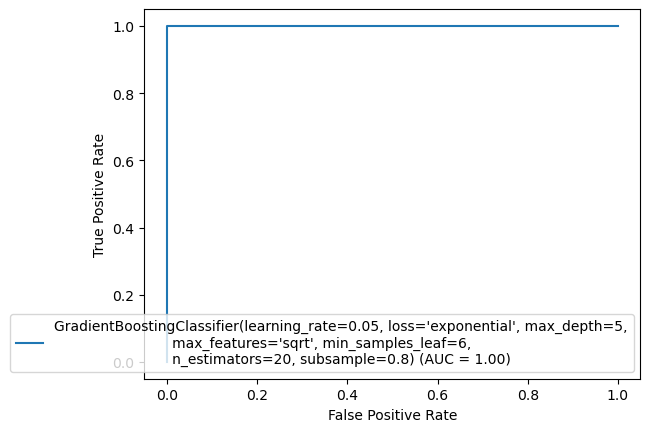

In [218]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()

In [213]:
import joblib
joblib.dump(final, "Glass Identification.pkl")

['Glass Identification.pkl']

In [215]:
model = joblib.load("Glass Identification.pkl")
prediction=final.predict(x_test)
prediction

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0], dtype=int64)

In [216]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
88,1,1
89,1,1
90,1,1
91,0,0


In [217]:
conclusion=pd.DataFrame([final.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
Predicted,1,0,1,1,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,0
Original,1,0,1,1,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,0
